## Deep Learning LAB

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


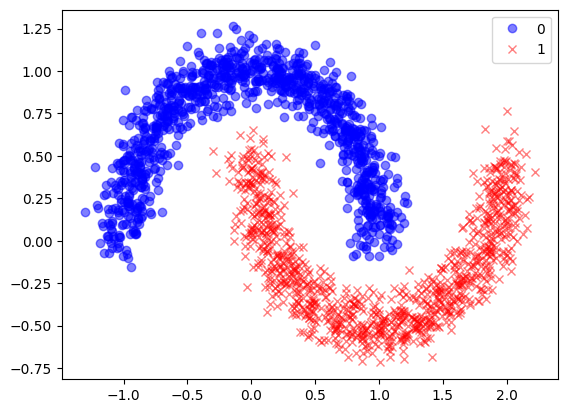

In [3]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=2000, noise=0.1, random_state=0)
plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
plt.legend(['0', '1'])

In [4]:
X.shape


(2000, 2)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=42)

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam

## Shallow Model


In [7]:
  model = Sequential()
model.add(Dense(1, input_shape=(2,), activation='sigmoid'))
model.compile(Adam(learning_rate=0.05), 'binary_crossentropy', metrics=['accuracy'])

C:\Users\Computer\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.fit(X_train, y_train, epochs=200, verbose=0)


In [9]:
results = model.evaluate(X_test, y_test)


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9094 - loss: 0.2195  


In [10]:
results

[0.2349555939435959, 0.8966666460037231]

In [11]:
print("The Accuracy score on the Train set is:\t{:0.3f}".format(results[1]))


The Accuracy score on the Train set is:	0.897


319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


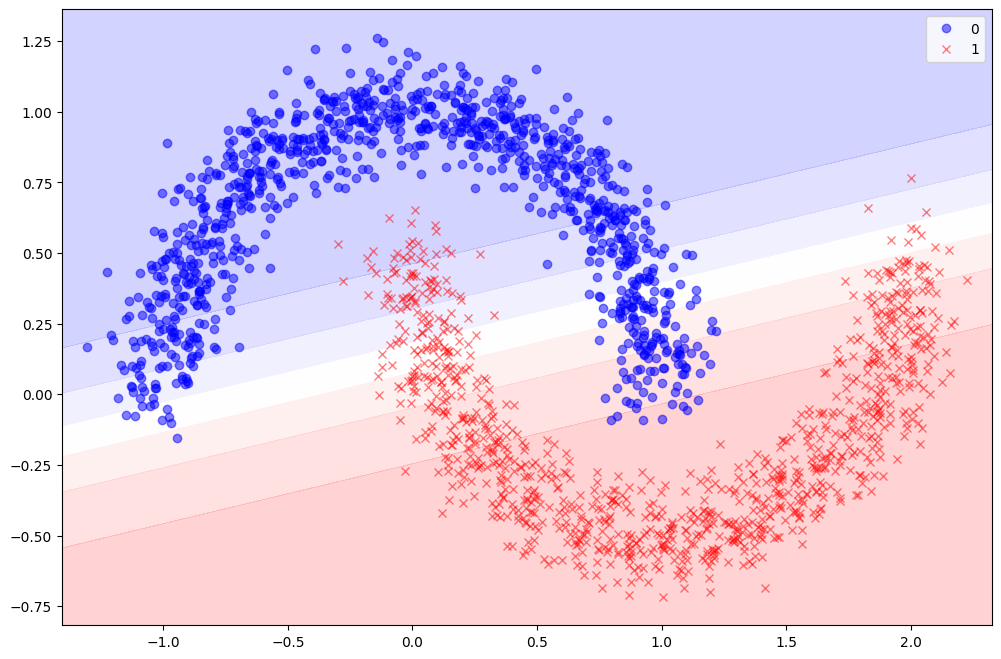

In [12]:
def plot_decision_boundary(model, X, y):
    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]
    
    c = model.predict(ab)
    cc = c.reshape(aa.shape)

    plt.figure(figsize=(12, 8))
    plt.contourf(aa, bb, cc, cmap='bwr', alpha=0.2)
    plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
    plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
    plt.legend(['0', '1'])
    
plot_decision_boundary(model, X, y)

## Deep model


In [13]:
model = Sequential()
model.add(Dense(4, input_shape=(2,), activation='tanh'))
model.add(Dense(2, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
model.compile(Adam(learning_rate=0.05), 'binary_crossentropy', metrics=['accuracy'])

In [14]:
model.fit(X_train, y_train, epochs=100, verbose=0)


In [15]:
model.evaluate(X_test, y_test)


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 1.7163e-04  


[0.00020736141595989466, 1.0]

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [17]:
import numpy as np

# Convert predicted probabilities to binary predictions
y_train_pred_binary = np.where(y_train_pred > 0.5, 1, 0)

# Calculate accuracy
accuracy = np.mean(y_train == y_train_pred_binary)

print("The Accuracy score on the Train set is:\t{:0.3f}".format(accuracy))

The Accuracy score on the Train set is:	0.500


In [18]:
import numpy as np
from sklearn.metrics import accuracy_score

# Convert predicted probabilities to binary predictions
y_test_pred_binary = np.where(y_test_pred > 0.5, 1, 0)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_test_pred_binary)

print("The Accuracy score on the Test set is:\t{:0.3f}".format(accuracy))

The Accuracy score on the Test set is:	1.000


319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


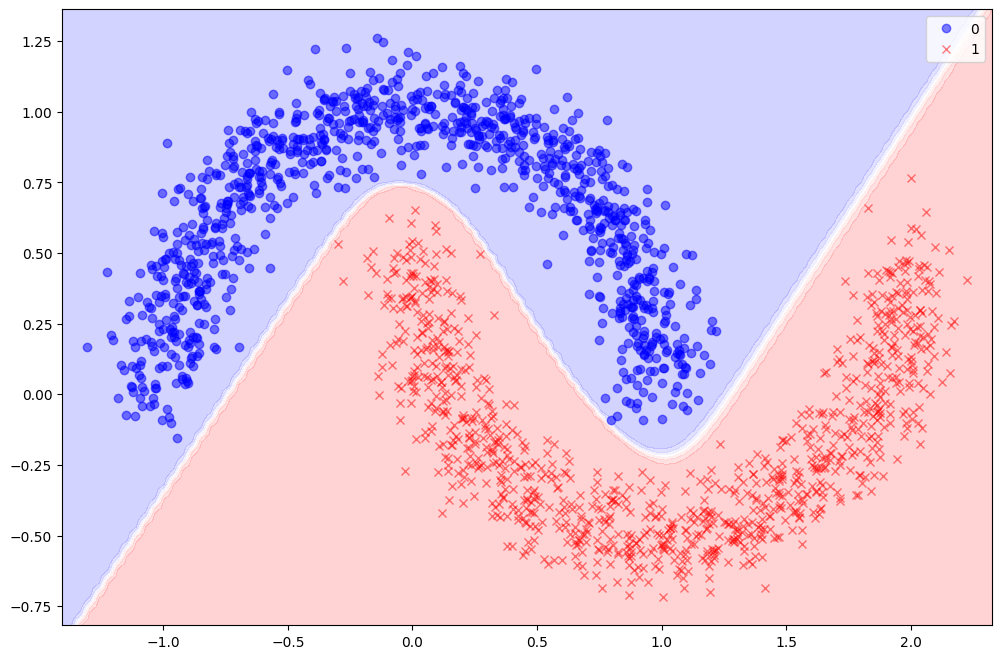

In [19]:
plot_decision_boundary(model, X, y)
